In [34]:
import sys,os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob2 

In [64]:
input_img=os.getcwd()+"\\input1"+"\\human1.jpg"
# input_img=os.getcwd()+"\\input1"+"\\car1.jpg"
'''note i have used an HD image of with least amount of blur. for some image with for bluring effect image may not look appeling '''

'note i have used an HD image of with least amount of blur. for some image with for bluring effect image may not look appeling '

<h2 style=color:orange;>Loading Image</h2>
<p>first we load input image into open cv by using <u><b  style="color:#87CEEB">cv2.imread()</b></u> <br>
after loading image we change the color maping of image since openCV uses <b style=color:blue>B</b><b style=color:green>G</b><b style=color:red>R</b> as an default format so we conert it into <b style=color:red>R</b><b style=color:green>G</b><b style=color:blue>B</b> fromat</p>

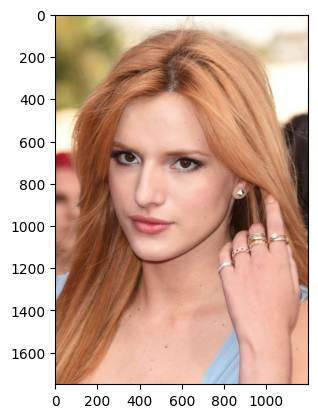

In [65]:
img=cv2.imread(input_img)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

<h2 style="color:orange">Grayscale conversion</h2>
<p>after loading image we will convert <b style=color:red>R</b><b style=color:green>G</b><b style=color:blue>B</b> to an <b style="color:gray">Grayscale image</b> which is easy for compute <br>here while printing i have cmap="gray" since even after grayscale convertion the opencv moudle may give output in <b style=color:blue>B</b><b style=color:green>G</b><b style=color:red>R</b> format </p>

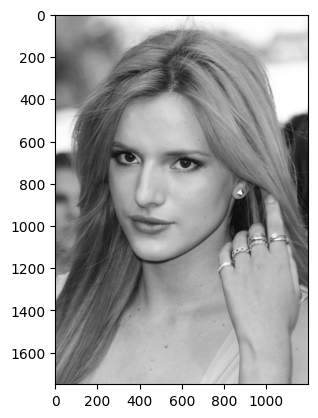

In [66]:
grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg,cmap="gray")

<h2 style="color:orange">creating Edge masking</h2>
<p>to create an scektech type effect we emphasizes the thickness of the edge in an image. To do so we create an edge masking image with input image <br> for detection of edges in image we uses <u><b style="color:#87CEEB">cv2.adaptiveThreshold()</b></u>.  </p>

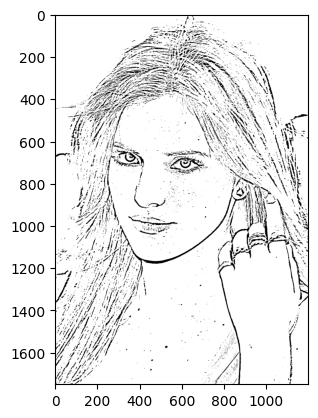

In [67]:
edgeimg=cv2.adaptiveThreshold(grayimg,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,17,9)
plt.imshow(edgeimg,cmap="gray")

<h2 style="color:orange">Color Quantization</h2>
<p>in this part we set how many number of distinct colors we can use to make image look more like an <u>sketch image</u> <br> here we create a fuction in witch we use we apply the <b style="color:#87CEEB">K-Means clustering algorithm</b> which is provided by the <i>OpenCV library</i>.<br> we can adjust number of colors to be selected by function by adjusting the value of K in K-Means algorithm</p>

In [68]:
def color_Quantity(img,k):
    data=np.float32(img).reshape((-1,3))
    
    criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

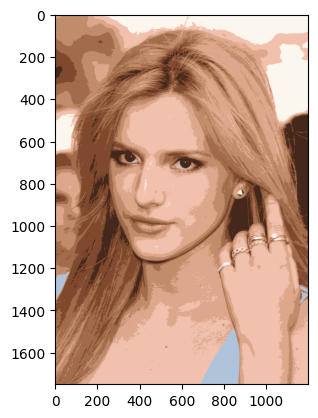

In [69]:
img_c=color_Quantity(img,8)
plt.imshow(img_c,cmap="gray")

<h2 style="color:orange">Bilateral Filter</h2>
<p>after performing color quantization, the noise present in the image should be reduce to do so we use <b style="color:#87CEEB">Bi-Lateral Filter</b> which would make image little blurred and reduce the sharpness to elemenate some noise </p>

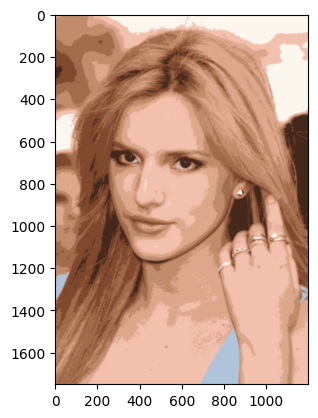

In [70]:
colorimg=cv2.bilateralFilter(img_c,9,250,250)
plt.imshow(colorimg,cmap="gray")

<h2 style="color:orange">Binding edge mask on colored image</h2>
<p>in the end we bind the edge mask on the colored image by using <b style="color:#87CEEB">cv2.bitwise_and()</b><br>as an end result we get an nearly relative sketch image of the orignal input</p>

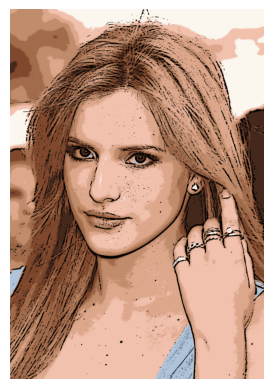

In [71]:
cartoonimg=cv2.bitwise_and(colorimg,colorimg,mask=edgeimg)
plt.axis("off")
plt.imshow(cartoonimg,cmap="gray")